# NBaIoT SOM+Algos CLASSIFY

## Device 8

- Training on device 8 (using both Mirai and Gafgyt).
- Testing on device 8 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 8

In [8]:
train_index

8

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((46585, 115), (46585,)),
 ((303223, 115), (303223,)),
 ((513248, 115), (513248,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((32609, 115), (13976, 115), (32609,), (13976,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((212256, 115), (90967, 115), (212256,), (90967,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((359273, 115), (153975, 115), (359273,), (153975,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

32609


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(32609, 115) (32609,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(65218, 115) (65218,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(32609, 115) (32609,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(65218, 115) (65218,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(104943, 115) (104943,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((13976, 115), (90967, 115), (13976,), (90967,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(167951, 115) (167951,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(117565, 115) (117565,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 5.62196251e-03  8.93143853e-02  2.07415638e-03 ...  4.72802325e-18
   1.49669395e-33  0.00000000e+00]
 [ 3.52787541e-03  7.31696845e-02  3.37370979e-04 ...  2.68685022e-18
   2.30431594e-35  1.21655120e-18]
 [ 3.38457608e-03  1.16513119e-01  1.16906733e-15 ...  1.19762703e-17
  -3.80841927e-34 -5.79818262e-18]
 ...
 [ 3.38457613e-03  7.13345679e-02  7.21130490e-09 ...  9.47687480e-19
  -5.00873818e-34  0.00000000e+00]
 [ 3.38457627e-03  7.13345809e-02  2.48263018e-08 ...  9.47687480e-19
   4.81609440e-34  0.00000000e+00]
 [ 3.38457628e-03  7.13345816e-02  2.58130366e-08 ...  5.51949851e-18
  -1.63006272e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.987     0.986     13976
           2      0.998     0.998     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.992     0.993     0.992    104943
weighted avg      0.996     0.996     0.996    104943



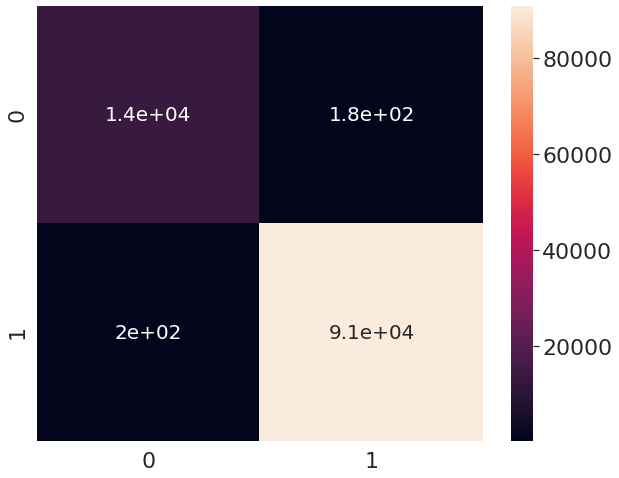

AUC score:  0.9925216477258537


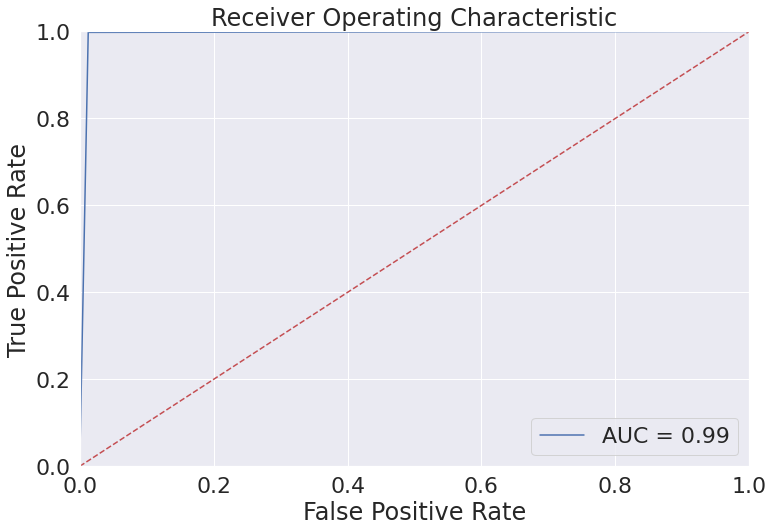

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.987     0.987     13976
           2      0.998     0.998     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.992     0.993     0.992    104943
weighted avg      0.996     0.996     0.996    104943



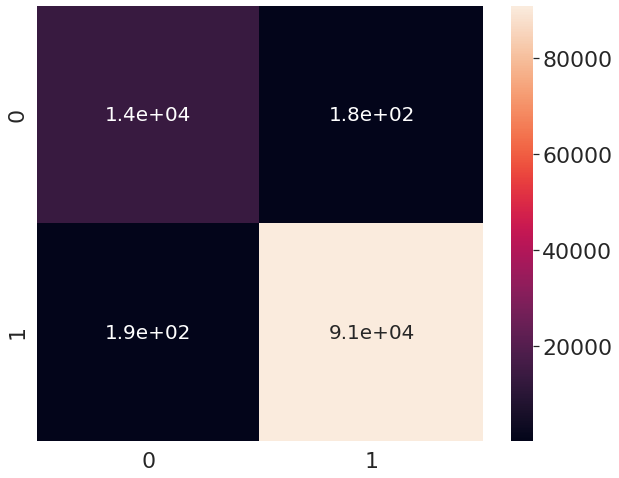

AUC score:  0.9925518300952769


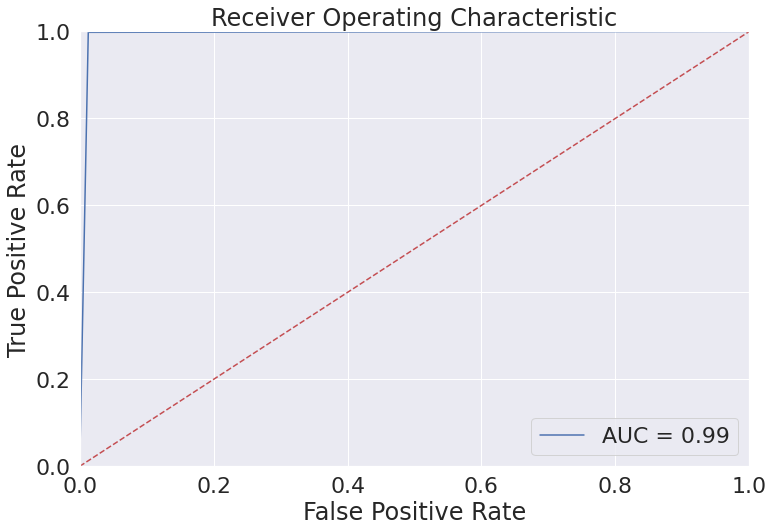

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.987     0.986     13976
           2      0.998     0.998     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.992     0.993     0.992    104943
weighted avg      0.996     0.996     0.996    104943



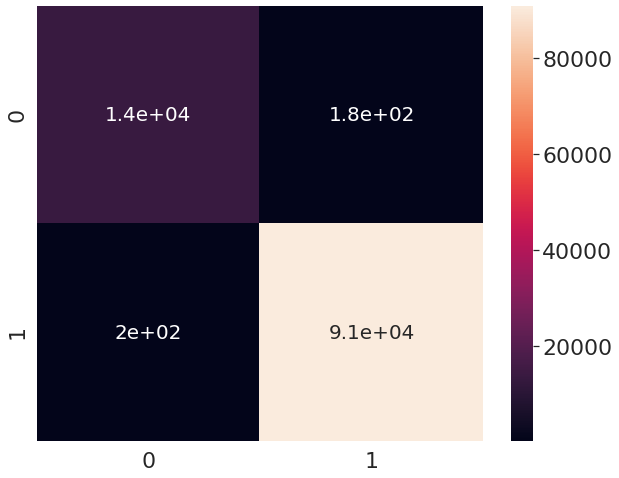

AUC score:  0.9925216477258537


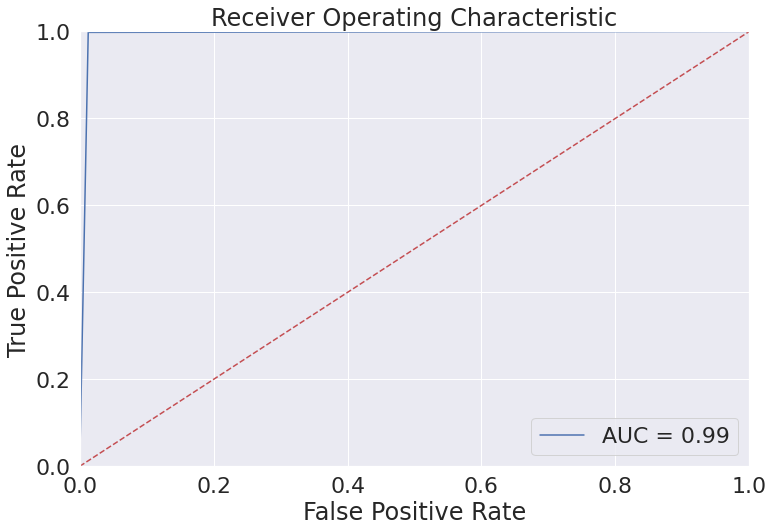

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.987     0.986     13976
           2      0.998     0.998     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.992     0.993     0.992    104943
weighted avg      0.996     0.996     0.996    104943



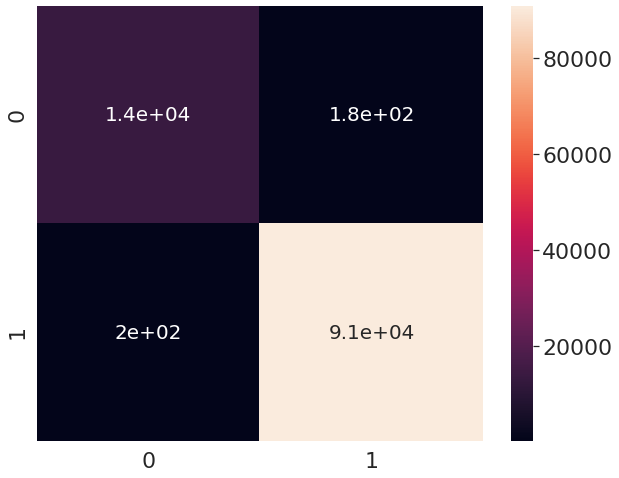

AUC score:  0.9925216477258537


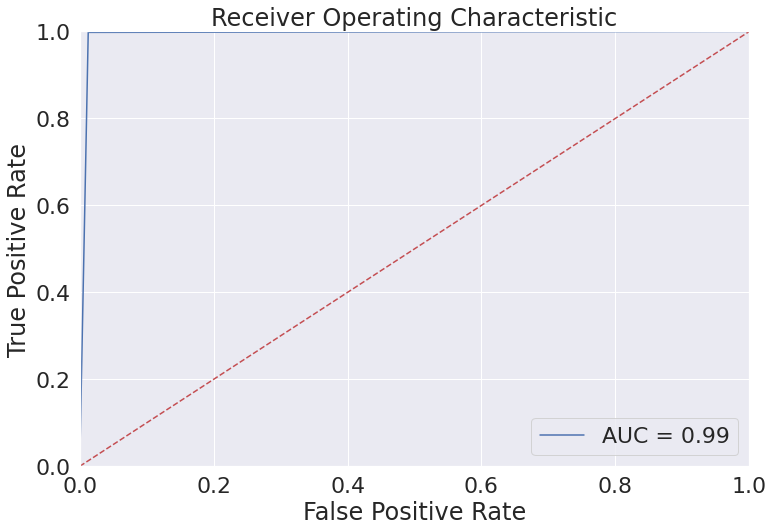

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.987     0.986     13976
           2      0.998     0.998     0.998     90967

    accuracy                          0.996    104943
   macro avg      0.992     0.993     0.992    104943
weighted avg      0.996     0.996     0.996    104943



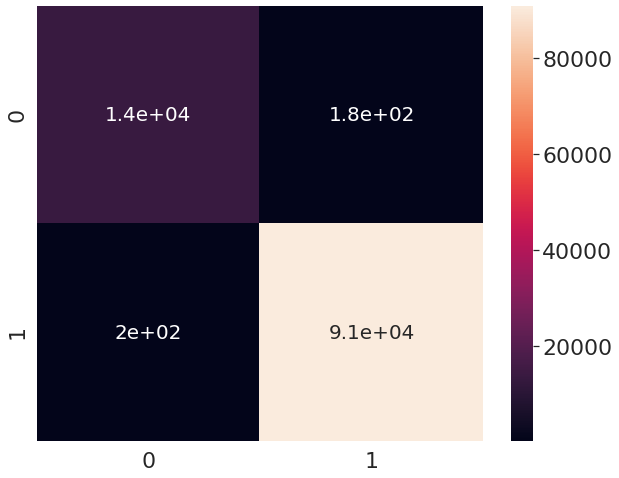

AUC score:  0.9925216477258537


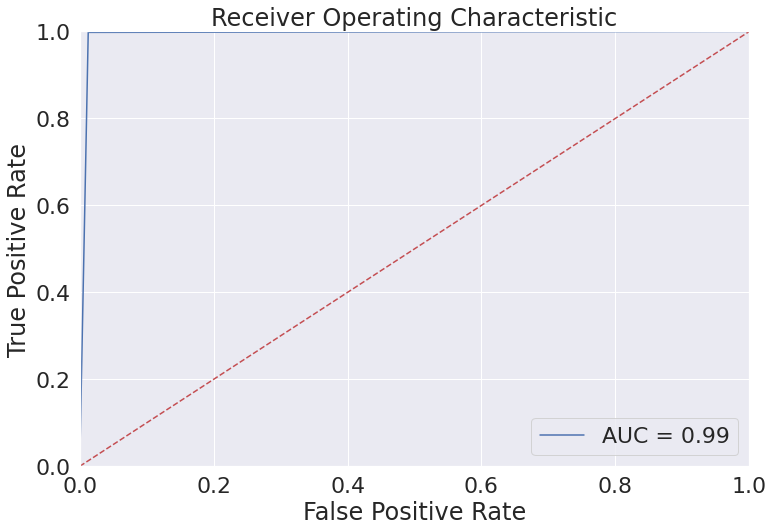

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.138     0.988     0.243      9821
           2      0.997     0.439     0.609    107744

    accuracy                          0.484    117565
   macro avg      0.568     0.713     0.426    117565
weighted avg      0.926     0.484     0.579    117565



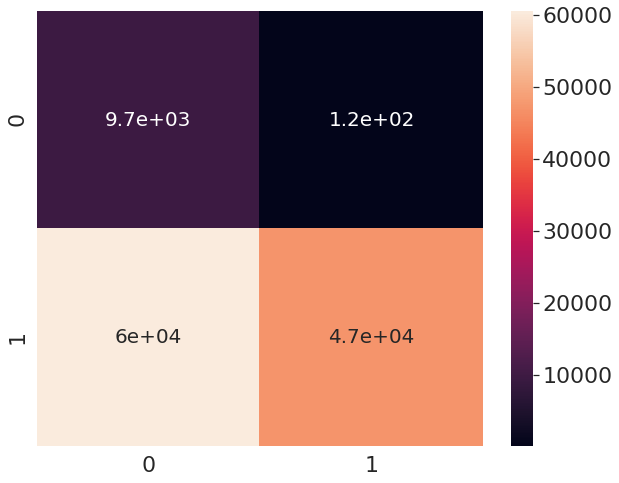

AUC score:  0.7131975180576392


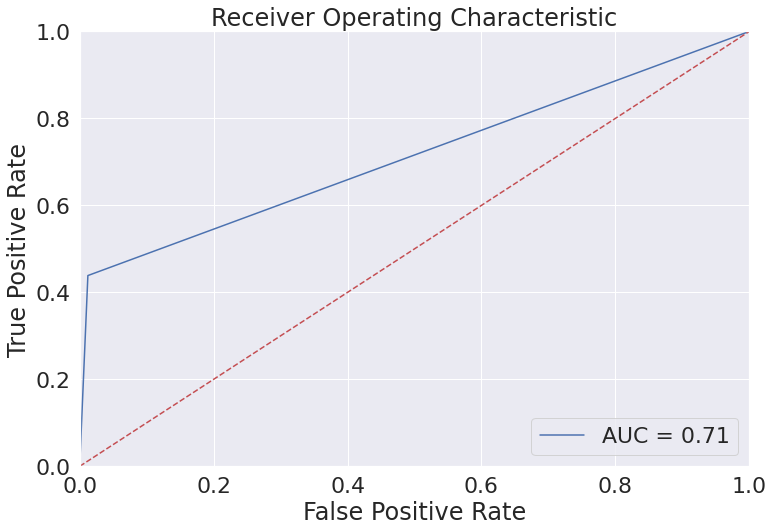

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.138     0.988     0.242      9821
           2      0.997     0.439     0.609    107744

    accuracy                          0.484    117565
   macro avg      0.568     0.713     0.426    117565
weighted avg      0.926     0.484     0.579    117565



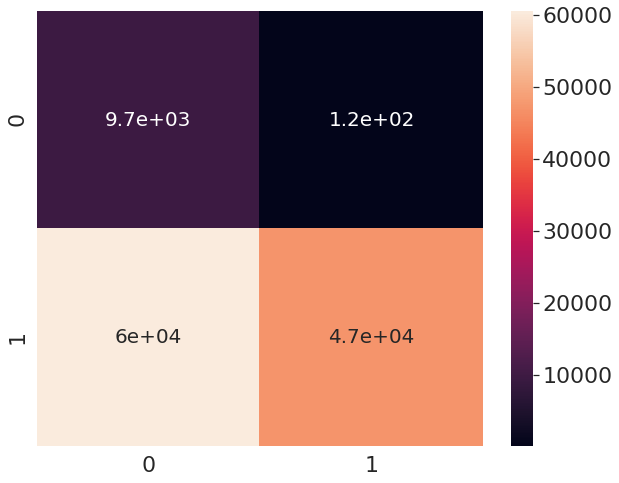

AUC score:  0.7131466067451455


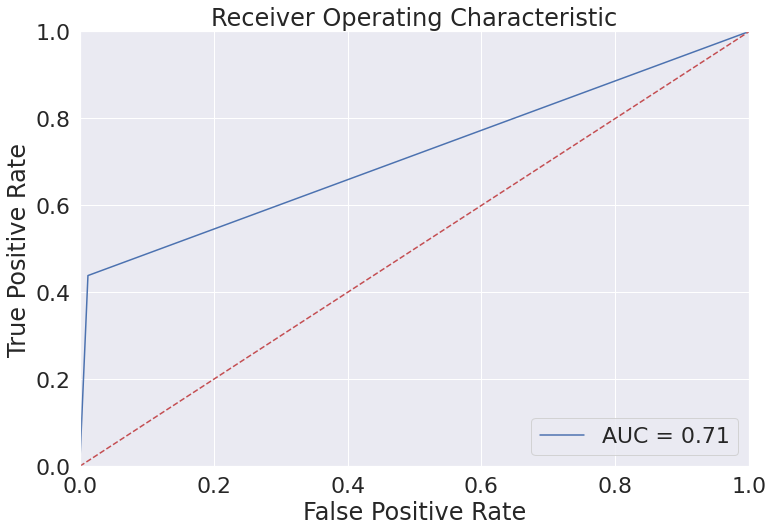

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.138     0.988     0.243      9821
           2      0.997     0.439     0.609    107744

    accuracy                          0.484    117565
   macro avg      0.568     0.713     0.426    117565
weighted avg      0.926     0.484     0.579    117565



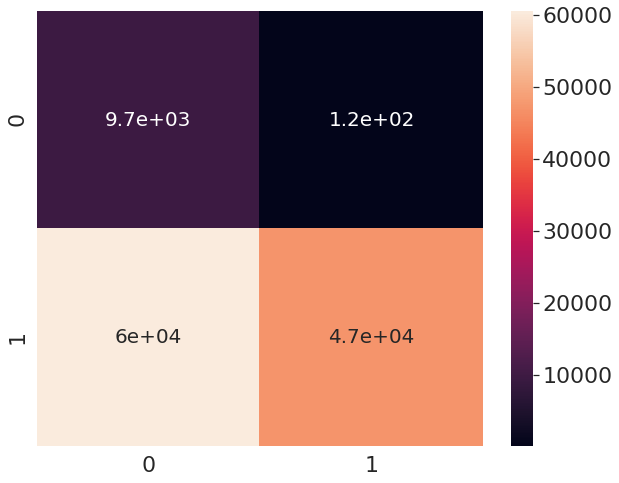

AUC score:  0.7131975180576392


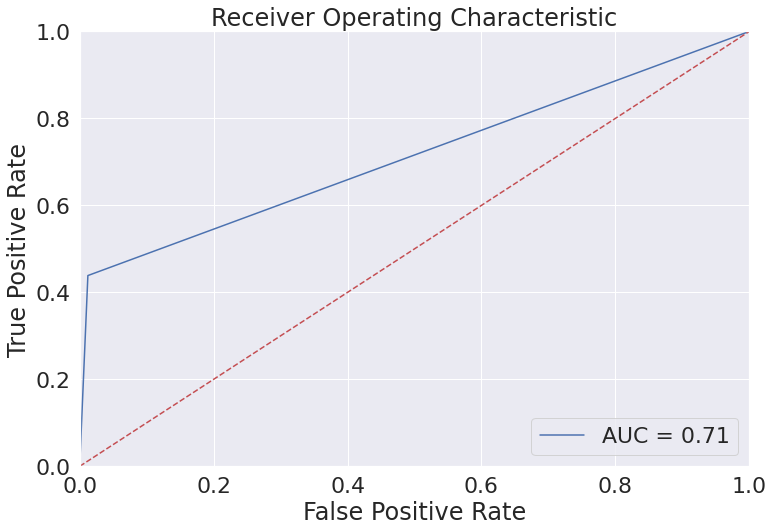

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.138     0.988     0.243      9821
           2      0.997     0.439     0.609    107744

    accuracy                          0.484    117565
   macro avg      0.568     0.713     0.426    117565
weighted avg      0.926     0.484     0.579    117565



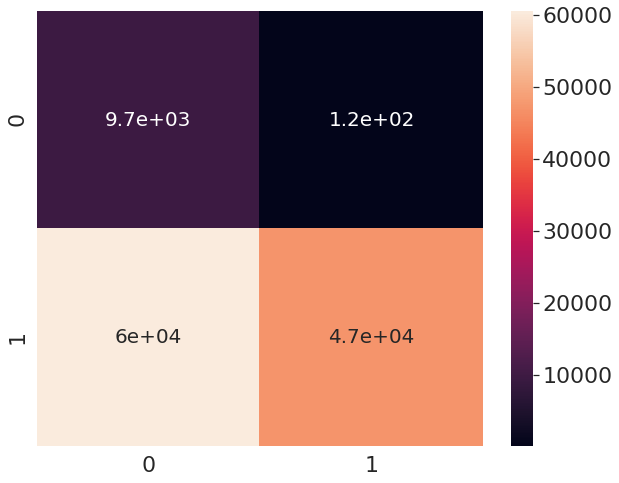

AUC score:  0.7131975180576392


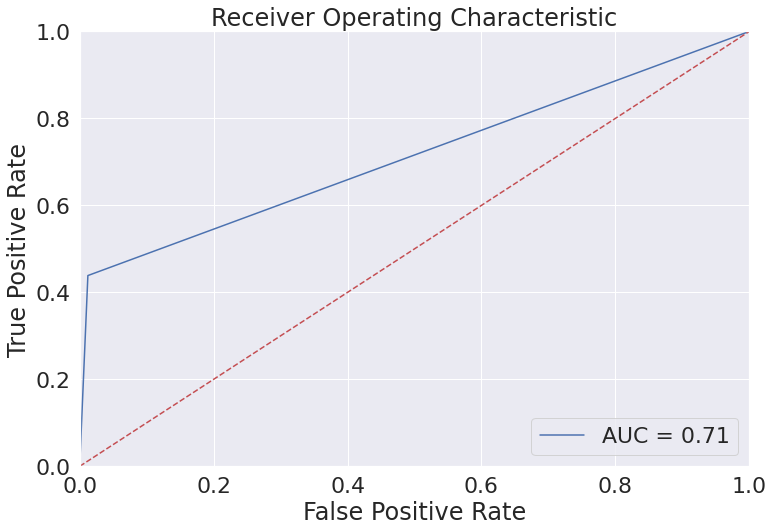

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.138     0.988     0.243      9821
           2      0.997     0.439     0.609    107744

    accuracy                          0.484    117565
   macro avg      0.568     0.713     0.426    117565
weighted avg      0.926     0.484     0.579    117565



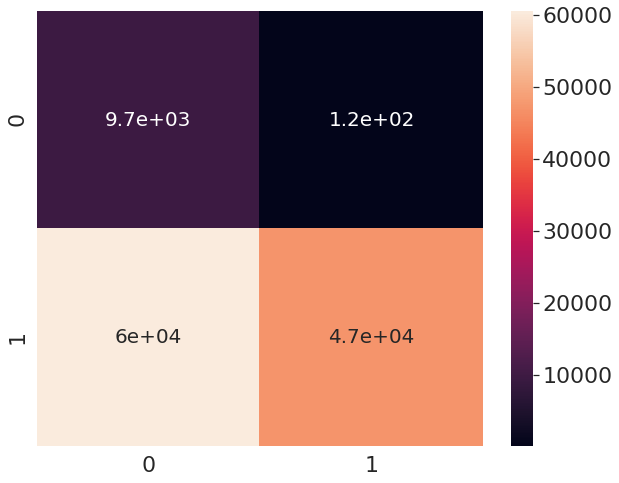

AUC score:  0.7131975180576392


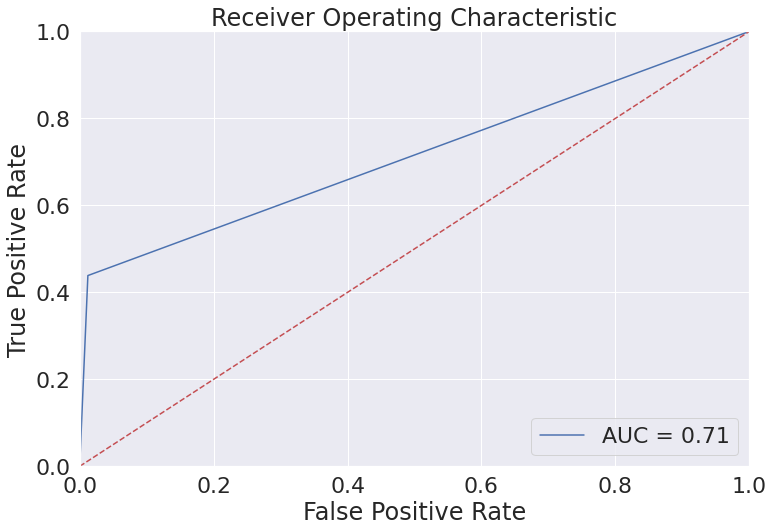

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(65218, 115) (65218,)
------------Scale data-----------------
(65218, 115) (65218,)
X_train_scaled
[[ 3.88939801e-03  1.33696854e-01  5.40499912e-03 ...  4.72802325e-18
   1.59755553e-33  0.00000000e+00]
 [ 2.44066224e-03  1.09529463e-01  8.79147717e-04 ...  2.68685022e-18
   2.45960282e-35  1.21655120e-18]
 [ 2.34152459e-03  1.74411294e-01  3.04644720e-15 ...  1.19762703e-17
  -4.06506704e-34 -5.79818262e-18]
 ...
 [ 2.34152463e-03  1.06782433e-01  1.87917830e-08 ...  9.47687480e-19
  -5.34627495e-34  0.00000000e+00]
 [ 2.34152472e-03  1.06782452e-01  6.46943215e-08 ...  9.47687480e-19
   5.14064899e-34  0.00000000e+00]
 [ 2.34152473e-03  1.06782453e-01  6.72656323e-08 ...  5.51949851e-18
  -1.73991196e-33 -4.44645907e-17]]
---------Normalize data--------------
(65218, 115) (65218,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.771     0.991     0.867     13976
           2      0.998     0.955     0.976     90967

    accuracy                          0.960    104943
   macro avg      0.885     0.973     0.922    104943
weighted avg      0.968     0.960     0.962    104943



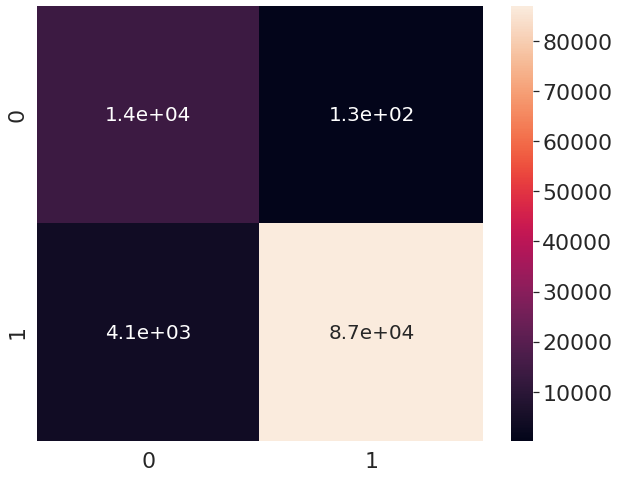

AUC score:  0.9727309809833162


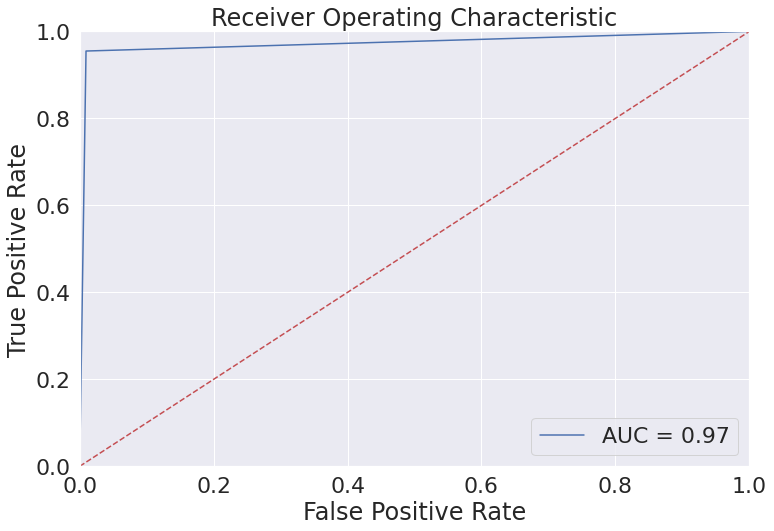

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.773     0.990     0.869     13976
           2      0.998     0.955     0.976     90967

    accuracy                          0.960    104943
   macro avg      0.886     0.973     0.923    104943
weighted avg      0.969     0.960     0.962    104943



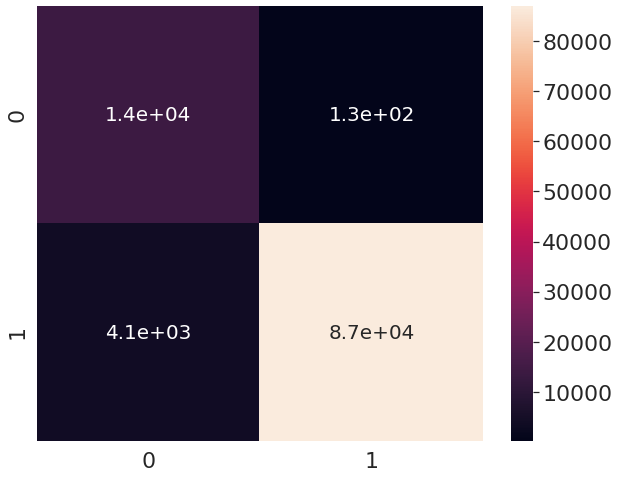

AUC score:  0.9729535408083001


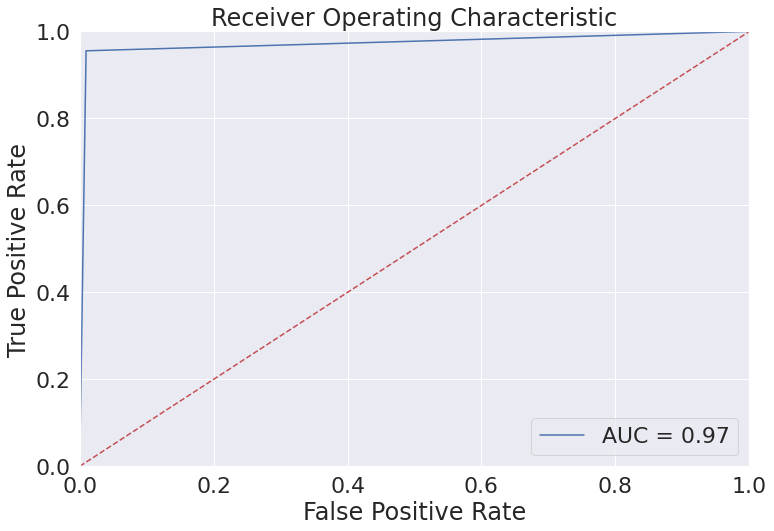

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.771     0.991     0.867     13976
           2      0.998     0.955     0.976     90967

    accuracy                          0.960    104943
   macro avg      0.885     0.973     0.922    104943
weighted avg      0.968     0.960     0.962    104943



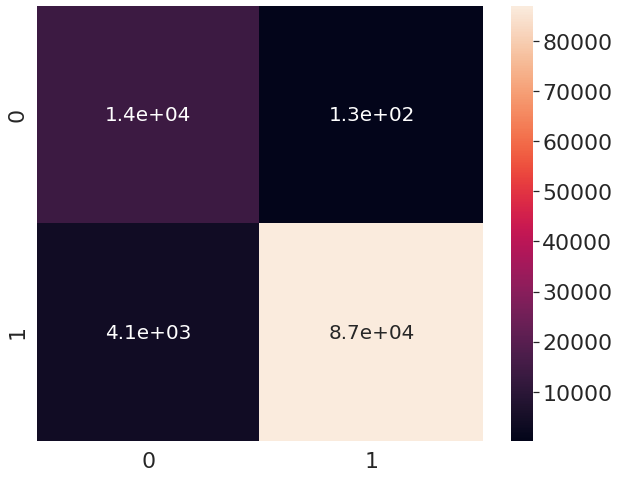

AUC score:  0.9727309809833162


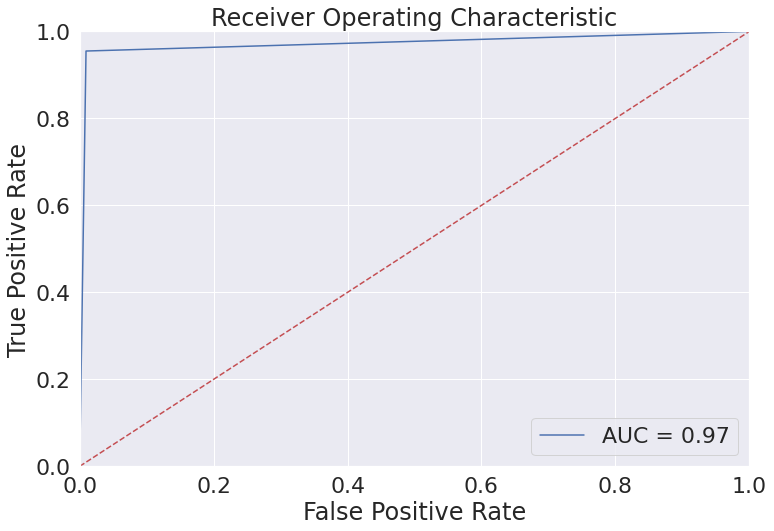

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.771     0.991     0.867     13976
           2      0.998     0.955     0.976     90967

    accuracy                          0.960    104943
   macro avg      0.885     0.973     0.922    104943
weighted avg      0.968     0.960     0.962    104943



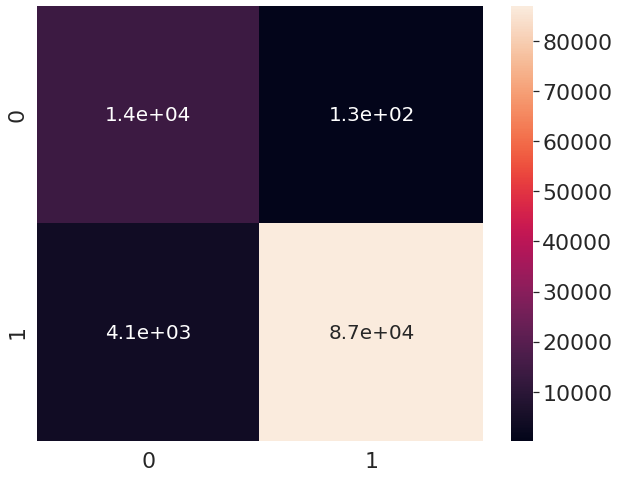

AUC score:  0.9727309809833162


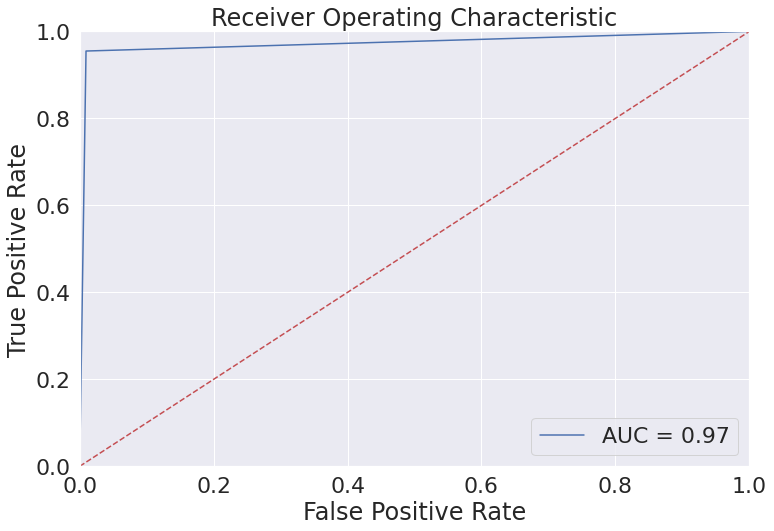

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (104943, 115) (104943,)
----------------------Test is starting----------------------
Scale data
Shape:  (104943, 115) (104943,)
Normalize data
Shape:  (104943, 115) (104943,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.771     0.991     0.867     13976
           2      0.998     0.955     0.976     90967

    accuracy                          0.960    104943
   macro avg      0.885     0.973     0.922    104943
weighted avg      0.968     0.960     0.962    104943



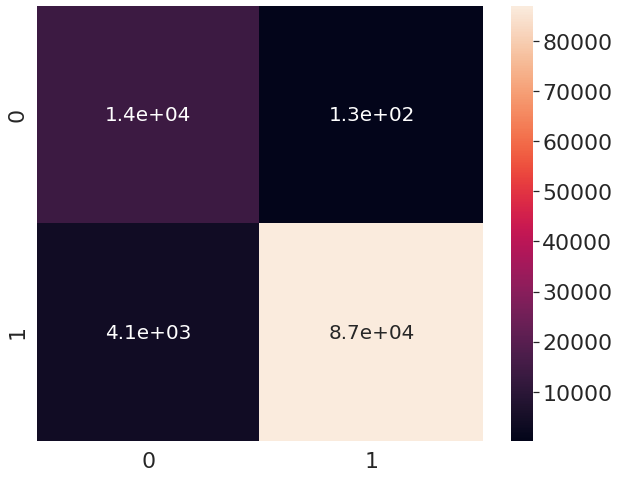

AUC score:  0.9727309809833162


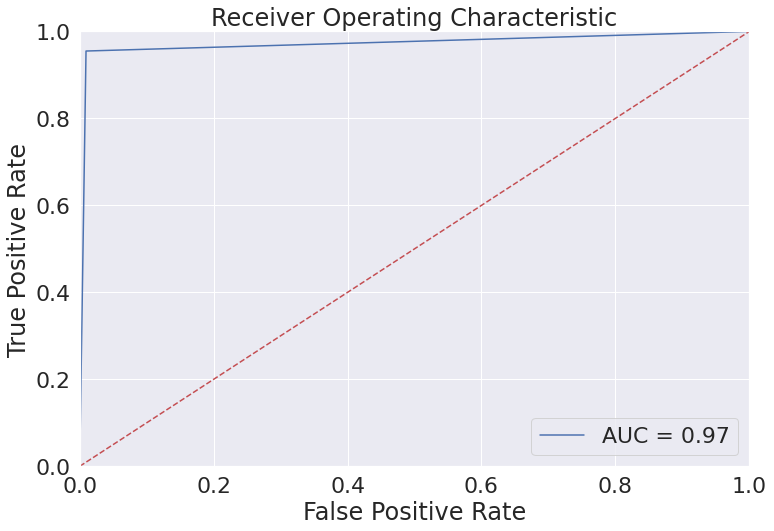

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.991     0.991      9821
           2      0.999     0.999     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.995     0.995     0.995    117565
weighted avg      0.999     0.999     0.999    117565



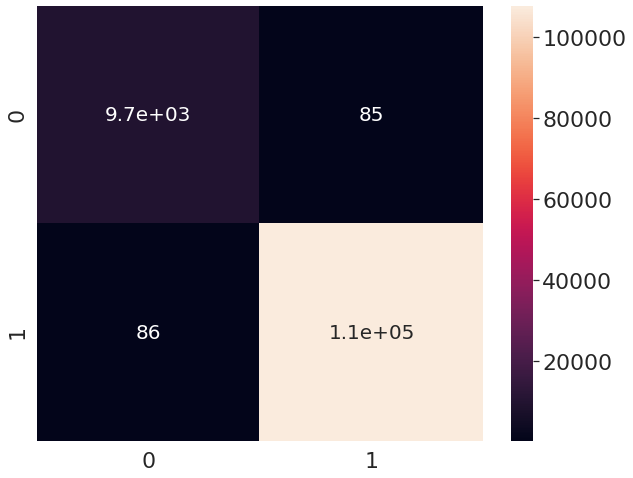

AUC score:  0.9952734442889468


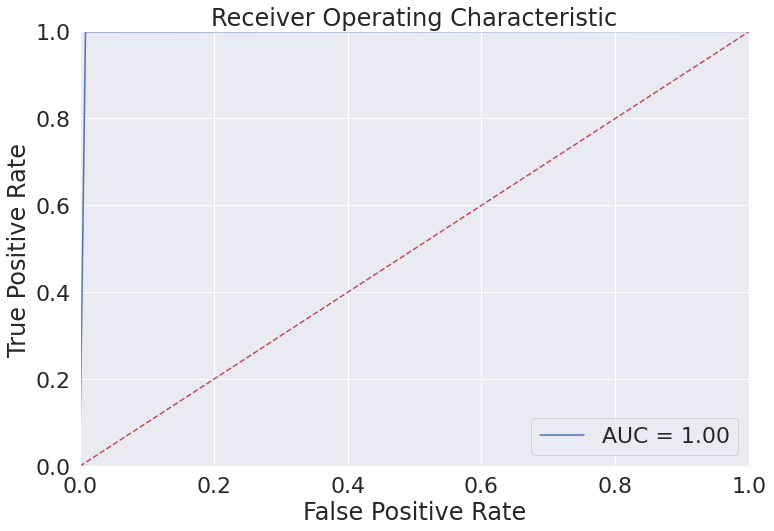

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.991     0.991      9821
           2      0.999     0.999     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.995     0.995     0.995    117565
weighted avg      0.999     0.999     0.999    117565



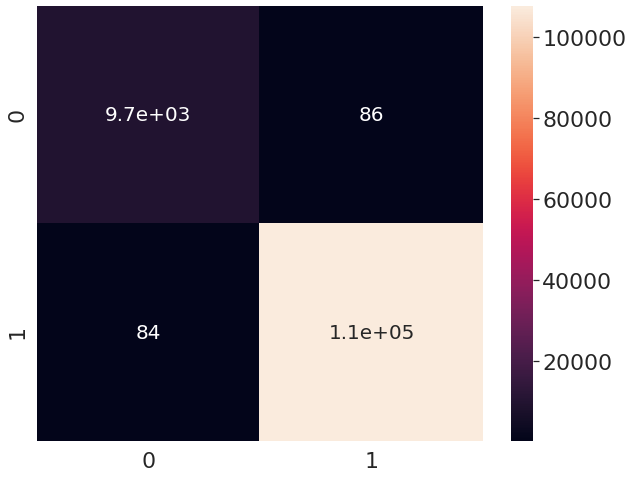

AUC score:  0.9952318142357345


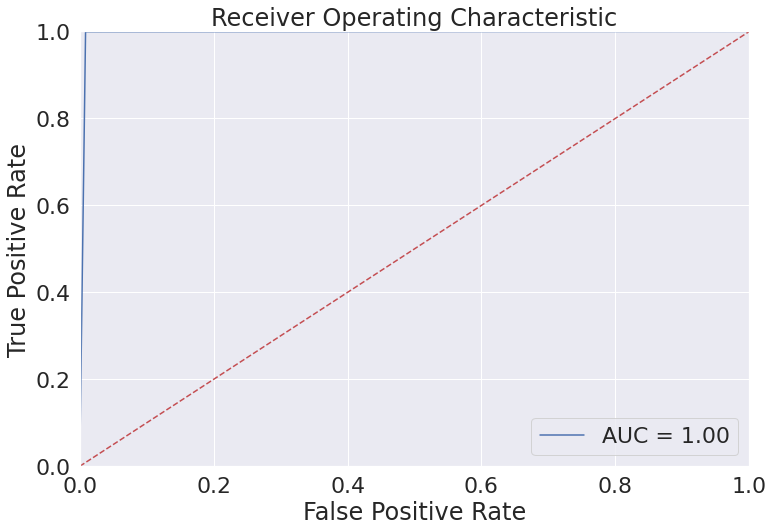

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.991     0.991      9821
           2      0.999     0.999     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.995     0.995     0.995    117565
weighted avg      0.999     0.999     0.999    117565



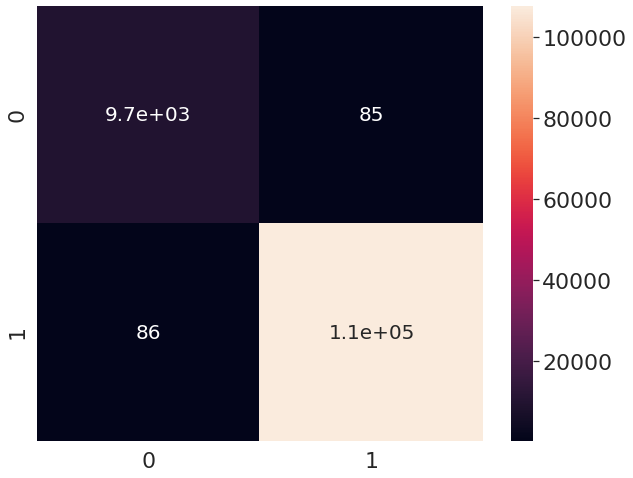

AUC score:  0.9952734442889468


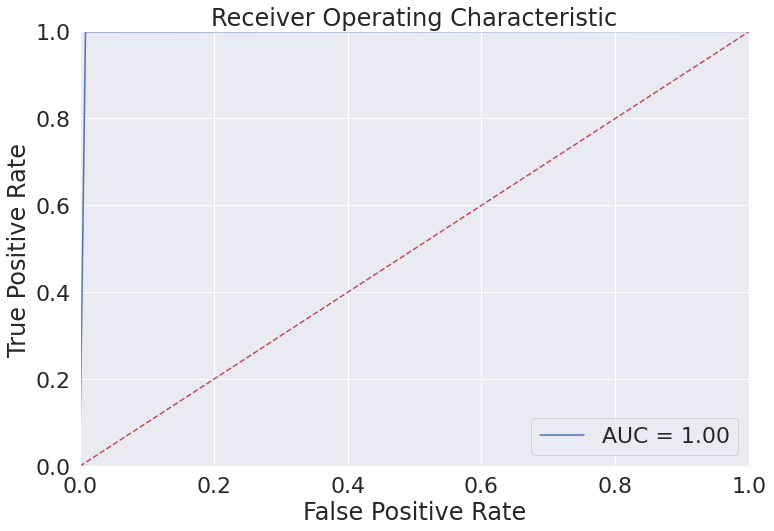

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.991     0.991      9821
           2      0.999     0.999     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.995     0.995     0.995    117565
weighted avg      0.999     0.999     0.999    117565



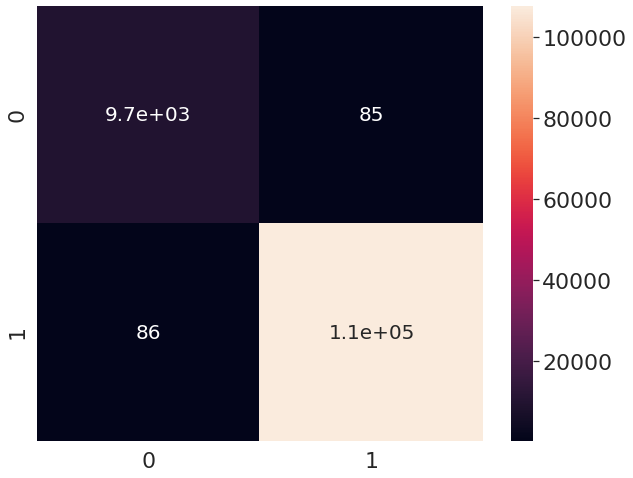

AUC score:  0.9952734442889468


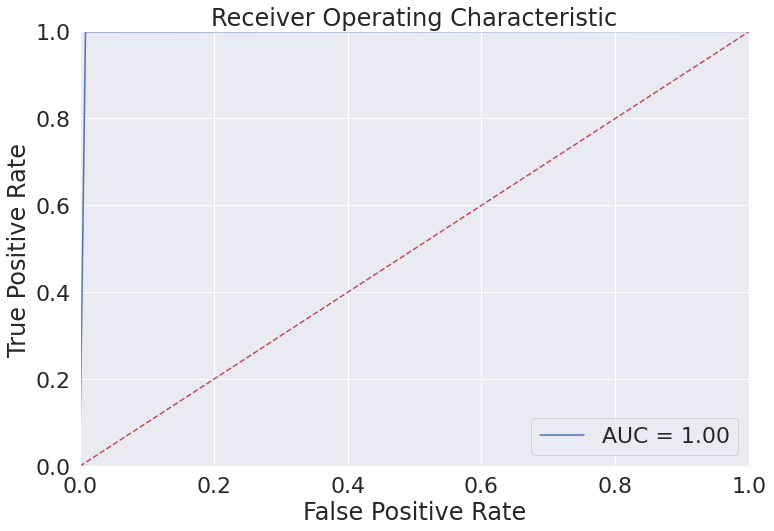

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (117565, 115) (117565,)
----------------------Test is starting----------------------
Scale data
Shape:  (117565, 115) (117565,)
Normalize data
Shape:  (117565, 115) (117565,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.991     0.991     0.991      9821
           2      0.999     0.999     0.999    107744

    accuracy                          0.999    117565
   macro avg      0.995     0.995     0.995    117565
weighted avg      0.999     0.999     0.999    117565



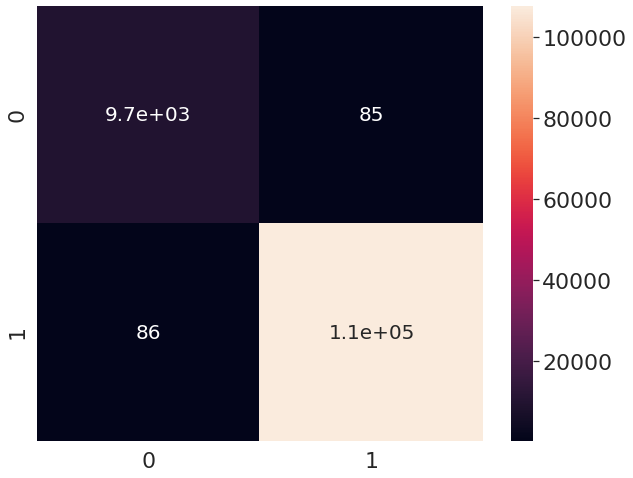

AUC score:  0.9952734442889468


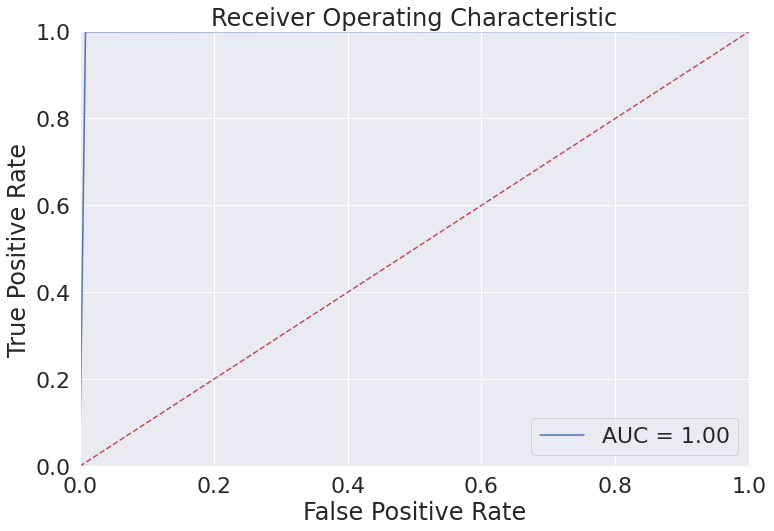

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)